In [162]:
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import Model, Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

from tensorflow.keras.layers import Dense, Conv1D, LSTM, Lambda, Reshape, RNN, LSTMCell

import warnings
warnings.filterwarnings('ignore')

In [163]:
plt.rcParams['figure.figsize'] = (15, 7.5)  # Ensure that all plots have a consistent size (15 inches wide, 7.5 inches tall)
plt.rcParams['axes.grid'] = True  # Enables grid lines on all plots
plt.rcParams['grid.linestyle'] = '--'  # Dashed grid lines
plt.rcParams['grid.alpha'] = 0.7  # Transparency

In [164]:
# Ensure reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [165]:
Update_data = pd.read_excel('Update_data.xlsx')

Update_data.interpolate(method='linear', inplace=True)  

Update_data['Date'] = pd.to_datetime(Update_data['Date'])

In [166]:
Update_data.head()

,Date,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),pressure_msl (hPa),...,soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),FLT GEM Debiet influent oneven kant,FLT GEM Turb influent oneven
0,2020-12-31 15:00:00,4.0,78,0.5,0.5,0.0,0.0,0.0,0.0,1002.5,...,0.387,0.363,0.321,123,55,68,258.0,301.6,3483.320557,0.430411
1,2020-12-31 16:00:00,3.4,85,1.0,0.6,0.0,0.0,0.0,0.0,1003.1,...,0.387,0.363,0.321,62,25,37,192.7,183.6,3496.040518,0.522836
2,2020-12-31 17:00:00,1.5,94,0.6,-1.6,0.0,0.0,0.0,0.0,1003.6,...,0.387,0.363,0.321,9,3,6,39.9,46.2,3062.499873,0.512069
3,2020-12-31 18:00:00,0.8,95,0.1,-2.3,0.0,0.0,0.0,0.0,1003.8,...,0.387,0.363,0.321,0,0,0,0.0,0.0,1853.906166,0.450545
4,2020-12-31 19:00:00,-0.1,97,-0.5,-3.5,0.0,0.0,0.0,0.0,1004.1,...,0.387,0.363,0.321,0,0,0,0.0,0.0,2485.336366,0.405494


In [167]:
Update_data.tail()

,Date,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),pressure_msl (hPa),...,soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),shortwave_radiation (W/m²),direct_radiation (W/m²),diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),FLT GEM Debiet influent oneven kant,FLT GEM Turb influent oneven
26246,2023-12-30 05:00:00,6.9,90,5.4,2.6,0.0,0.0,0.0,0.0,1012.8,...,0.409,0.404,0.386,0,0,0,0.0,0.0,2484.231020,0.455236
26247,2023-12-30 06:00:00,6.9,90,5.5,2.7,0.0,0.0,0.0,0.0,1012.8,...,0.408,0.404,0.386,0,0,0,0.0,0.0,2490.089431,0.398240
26248,2023-12-30 07:00:00,6.7,91,5.4,2.9,0.0,0.0,0.0,0.0,1013.0,...,0.408,0.404,0.386,0,0,0,0.0,0.0,2497.638635,0.413984
26249,2023-12-30 08:00:00,6.6,93,5.5,2.7,0.0,0.0,0.0,0.0,1013.4,...,0.408,0.404,0.386,0,0,0,0.0,0.0,2502.516377,0.435343
26250,2023-12-30 09:00:00,6.6,93,5.6,2.7,0.0,0.0,0.0,0.0,1013.7,...,0.408,0.404,0.386,0,0,0,0.0,1.6,2484.011752,0.379473


In [168]:
Update_data.shape

(26251, 37)

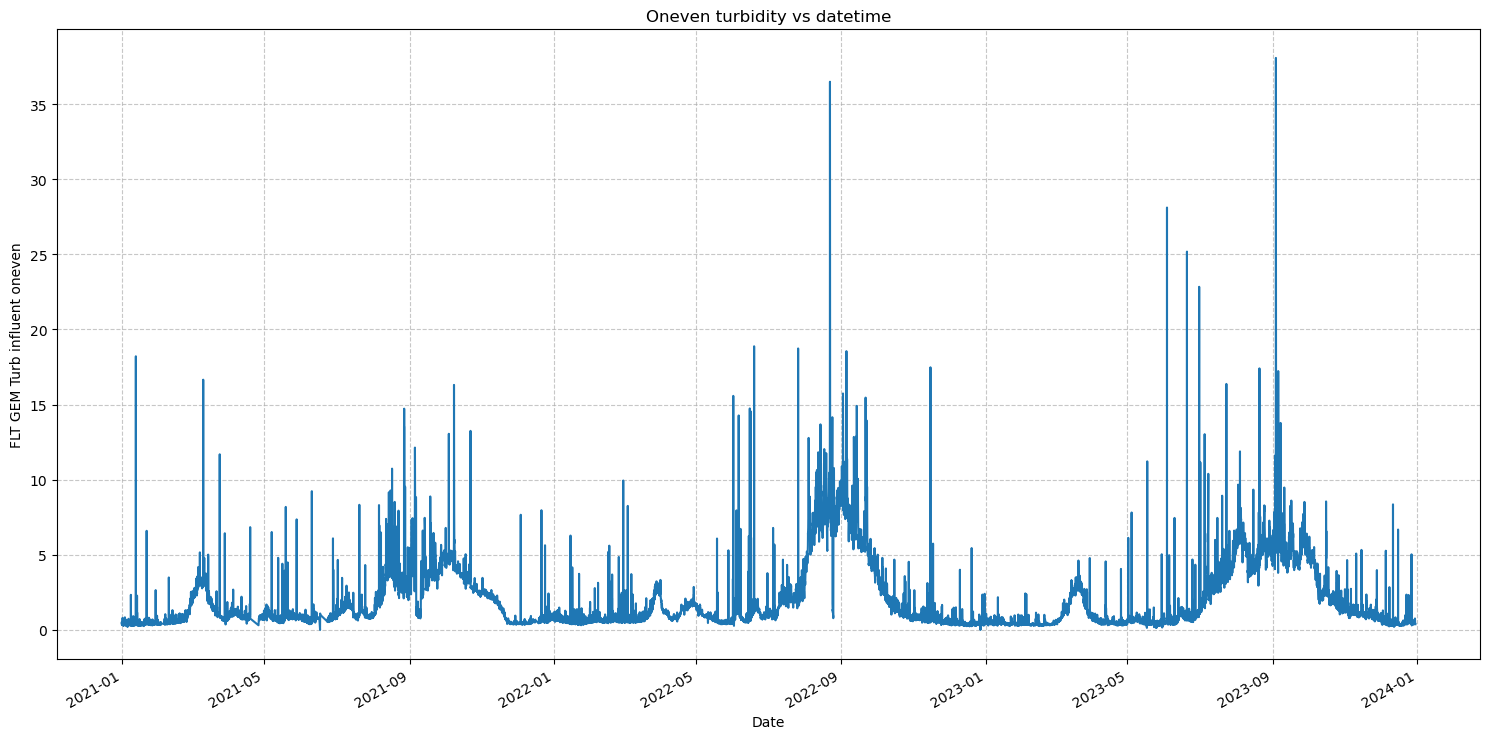

In [169]:
fig, ax = plt.subplots()
ax.plot(Update_data['Date'], Update_data['FLT GEM Turb influent oneven'])
ax.set_xlabel('Date')
ax.set_ylabel('FLT GEM Turb influent oneven')
ax.set_title('Oneven turbidity vs datetime')

fig.autofmt_xdate()
plt.tight_layout()
plt.savefig('figures/Oneven turbidity vs datetime.png', dpi=300)
plt.show()

In [170]:
Update_data.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Date,26251,2022-07-01 12:00:00,2020-12-31 15:00:00,2021-10-01 01:30:00,2022-07-01 12:00:00,2023-03-31 22:30:00,2023-12-30 09:00:00,NaN
temperature_2m (°C),26251.0,11.539221,-9.1,6.5,11.3,16.6,37.0,6.942224
relative_humidity_2m (%),26251.0,77.90168,20.0,68.0,82.0,90.0,100.0,15.49949
dew_point_2m (°C),26251.0,7.403897,-14.2,3.5,7.7,11.7,22.5,5.581731
apparent_temperature (°C),26251.0,9.132334,-14.2,2.9,8.3,15.4,36.4,8.29379
precipitation (mm),26251.0,0.099436,0.0,0.0,0.0,0.0,17.3,0.409789
rain (mm),26251.0,0.097067,0.0,0.0,0.0,0.0,17.3,0.406072
snowfall (cm),26251.0,0.001659,0.0,0.0,0.0,0.0,1.75,0.031641
snow_depth (m),26251.0,0.000959,0.0,0.0,0.0,0.0,0.09,0.007308
pressure_msl (hPa),26251.0,1016.283761,969.7,1010.4,1016.9,1022.9,1043.7,10.10992


In [171]:
import pandas as pd

# Convert to datetime first
Update_data['Date'] = pd.to_datetime(Update_data['Date'])

# Extract various float features
Update_data['year'] = Update_data['Date'].dt.year.astype(float)
Update_data['month'] = Update_data['Date'].dt.month.astype(float)
Update_data['day'] = Update_data['Date'].dt.day.astype(float)
Update_data['hour'] = Update_data['Date'].dt.hour.astype(float)


# Optional: Create a single float representation using decimal time
Update_data['decimal_time'] = (Update_data['year'] + 
                     (Update_data['month'] - 1) / 12 + 
                     (Update_data['day'] - 1) / 365 + 
                     Update_data['hour'] / (24 * 365) )
                     

In [172]:
Update_data = Update_data.drop(columns=['Date'])


In [173]:
Update_data

,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),pressure_msl (hPa),surface_pressure (hPa),...,diffuse_radiation (W/m²),direct_normal_irradiance (W/m²),terrestrial_radiation (W/m²),FLT GEM Debiet influent oneven kant,FLT GEM Turb influent oneven,year,month,day,hour,decimal_time
0,4.0,78,0.5,0.5,0.0,0.0,0.0,0.0,1002.5,1001.9,...,68,258.0,301.6,3483.320557,0.430411,2020.0,12.0,31.0,15.0,2021.000571
1,3.4,85,1.0,0.6,0.0,0.0,0.0,0.0,1003.1,1002.5,...,37,192.7,183.6,3496.040518,0.522836,2020.0,12.0,31.0,16.0,2021.000685
2,1.5,94,0.6,-1.6,0.0,0.0,0.0,0.0,1003.6,1003.0,...,6,39.9,46.2,3062.499873,0.512069,2020.0,12.0,31.0,17.0,2021.000799
3,0.8,95,0.1,-2.3,0.0,0.0,0.0,0.0,1003.8,1003.2,...,0,0.0,0.0,1853.906166,0.450545,2020.0,12.0,31.0,18.0,2021.000913
4,-0.1,97,-0.5,-3.5,0.0,0.0,0.0,0.0,1004.1,1003.5,...,0,0.0,0.0,2485.336366,0.405494,2020.0,12.0,31.0,19.0,2021.001027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26246,6.9,90,5.4,2.6,0.0,0.0,0.0,0.0,1012.8,1012.2,...,0,0.0,0.0,2484.231020,0.455236,2023.0,12.0,30.0,5.0,2023.996689
26247,6.9,90,5.5,2.7,0.0,0.0,0.0,0.0,1012.8,1012.2,...,0,0.0,0.0,2490.089431,0.398240,2023.0,12.0,30.0,6.0,2023.996804
26248,6.7,91,5.4,2.9,0.0,0.0,0.0,0.0,1013.0,1012.4,...,0,0.0,0.0,2497.638635,0.413984,2023.0,12.0,30.0,7.0,2023.996918
26249,6.6,93,5.5,2.7,0.0,0.0,0.0,0.0,1013.4,1012.8,...,0,0.0,0.0,2502.516377,0.435343,2023.0,12.0,30.0,8.0,2023.997032


In [174]:
n = len(Update_data)

# Split 70:20:10 (train:validation:test)
train_data = Update_data[0:int(n*0.7)]
val_data = Update_data[int(n*0.7):int(n*0.9)]
test_data = Update_data[int(n*0.9):]

train_data.shape, val_data.shape, val_data.shape

((18375, 41), (5250, 41), (5250, 41))

In [175]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_data)

train_data[train_data.columns] = scaler.transform(train_data[train_data.columns])
val_data[val_data.columns] = scaler.transform(val_data[val_data.columns])
test_data[test_data.columns] = scaler.transform(test_data[test_data.columns])

In [176]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temperature_2m (°C),18375.0,0.436739,0.151821,0.0,0.323210,0.431670,0.546638,1.0
relative_humidity_2m (%),18375.0,0.725168,0.196746,0.0,0.600000,0.775000,0.887500,1.0
dew_point_2m (°C),18375.0,0.605197,0.160734,0.0,0.487106,0.613181,0.733524,1.0
apparent_temperature (°C),18375.0,0.449639,0.164510,0.0,0.324111,0.434783,0.575099,1.0
precipitation (mm),18375.0,0.006949,0.028891,0.0,0.000000,0.000000,0.000000,1.0
rain (mm),18375.0,0.006746,0.028513,0.0,0.000000,0.000000,0.000000,1.0
snowfall (cm),18375.0,0.001054,0.018935,0.0,0.000000,0.000000,0.000000,1.0
snow_depth (m),18375.0,0.013998,0.095267,0.0,0.000000,0.000000,0.000000,1.0
pressure_msl (hPa),18375.0,0.600961,0.146400,0.0,0.511976,0.610778,0.702096,1.0
surface_pressure (hPa),18375.0,0.600945,0.146377,0.0,0.511976,0.610778,0.702096,1.0


In [177]:
train_data.to_csv('../data/train_data.csv')
val_data.to_csv('../data/val_data.csv')
test_data.to_csv('../data/test_data.csv')

In [178]:
train_data = pd.read_csv('../data/train_data.csv', index_col=0)
val_data = pd.read_csv('../data/val_data.csv', index_col=0)
test_data = pd.read_csv('../data/test_data.csv', index_col=0)
print(train_data.shape, val_data.shape, test_data.shape)

(18375, 41) (5250, 41) (2626, 41)


## Creating windows of data

In [179]:
# Defining the initialization function of DataWindow
class DataWindow():
    def __init__(self, input_width, label_width, shift, 
                 train_data=train_data, val_data=val_data, test_data=test_data, 
                 label_columns=None):
        
        self.train_data = train_data
        self.val_data = val_data
        self.test_data = test_data
        
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_data.columns)}
        
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        
        self.total_window_size = input_width + shift
        
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]
        
        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
    
    def split_to_inputs_labels(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:,:,self.column_indices[name]] for name in self.label_columns],
                axis=-1
            )
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])
        
        return inputs, labels
    
    def plot(self, model=None, plot_col='FLT GEM Turb influent oneven', max_subplots=3):
        inputs, labels = self.sample_batch
        
        plt.figure(figsize=(16, 10))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        
        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [scaled]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
              label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
              label_col_index = plot_col_index

            if label_col_index is None:
              continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', marker='s', label='Labels', c='green', s=64)
            if model is not None:
              predictions = model(inputs)
              plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='red', s=64)

            if n == 0:
              plt.legend()

        plt.xlabel('Time (h)')
        
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32
        )
        
        ds = ds.map(self.split_to_inputs_labels)
        return ds
    
    @property
    def train(self):
        return self.make_dataset(self.train_data)
    
    @property
    def val(self):
        return self.make_dataset(self.val_data)
    
    @property
    def test(self):
        return self.make_dataset(self.test_data)
    
    @property
    def sample_batch(self):
        result = getattr(self, '_sample_batch', None)
        if result is None:
            result = next(iter(self.train))
            self._sample_batch = result
        return result

## Implementing baseline models for deep learning

### Single-step baseline model

In [180]:
single_step_window = DataWindow(input_width=1, label_width=1, shift=1, label_columns=['FLT GEM Turb influent oneven']) 
wide_window = DataWindow(input_width=24, label_width=24, shift=1, label_columns=['FLT GEM Turb influent oneven'])

In [181]:
# Class to return the input data as a prediction
class Baseline(Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index
        
    def call(self, inputs):
        if self.label_index is None:
            return inputs
        
        elif isinstance(self.label_index, list):
            tensors = []
            for index in self.label_index:
                result = inputs[:, :, index]
                result = result[:, :, tf.newaxis]
                tensors.append(result)
            return tf.concat(tensors, axis=-1)
        
        result = inputs[:, :, self.label_index]
        return result[:,:,tf.newaxis]

In [182]:
column_indices = {name: i for i, name in enumerate(train_data.columns)}

baseline_last = Baseline(label_index=column_indices['FLT GEM Turb influent oneven'])

baseline_last.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

In [183]:
val_performance = {}
performance = {}

val_performance['Baseline - Last'] = baseline_last.evaluate(single_step_window.val)
performance['Baseline - Last'] = baseline_last.evaluate(single_step_window.test, verbose=0)

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - loss: 8.1115e-04 - mean_absolute_error: 0.0053


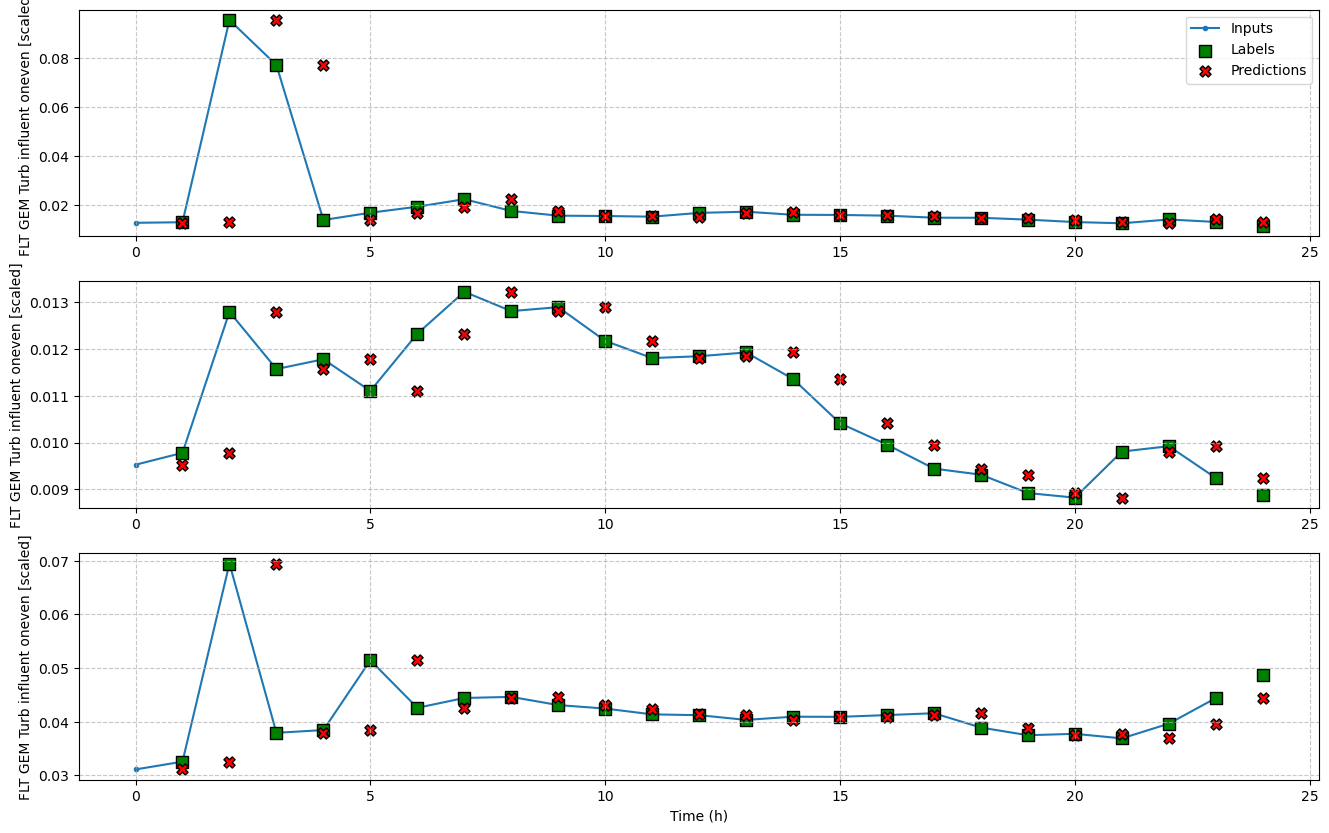

In [184]:
wide_window.plot(baseline_last)

plt.savefig('figures/CH13_F09_peixeiro.png', dpi=300)

In [185]:
print(performance['Baseline - Last'][1])

0.004367033485323191


### Multi-step baseline models

In [186]:
multi_window = DataWindow(input_width=24, label_width=24, shift=24, label_columns=['FLT GEM Turb influent oneven'])

#### Predicting the last known value

In [187]:
class MultiStepLastBaseline(Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index
        
    def call(self, inputs):
        if self.label_index is None:
            return tf.tile(inputs[:, -1:, :], [1, 24, 1])
        return tf.tile(inputs[:, -1:, self.label_index:], [1, 24, 1])

In [188]:
ms_baseline_last = MultiStepLastBaseline(label_index=column_indices['FLT GEM Turb influent oneven'])

ms_baseline_last.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

ms_val_performance = {}
ms_performance = {}

ms_val_performance['Baseline - Last'] = ms_baseline_last.evaluate(multi_window.val)
ms_performance['Baseline - Last'] = ms_baseline_last.evaluate(multi_window.test, verbose=0)

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.4634 - mean_absolute_error: 0.5448


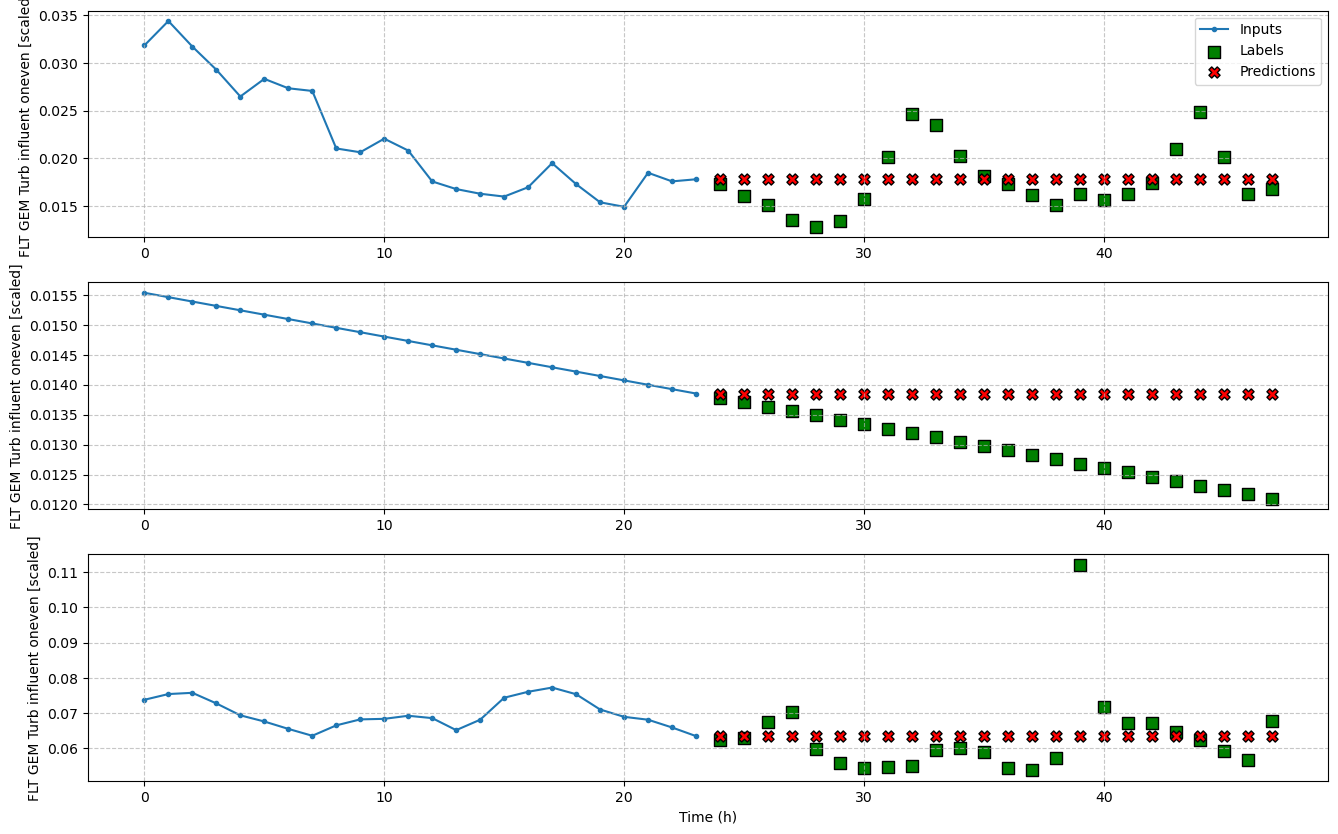

In [189]:
multi_window.plot(ms_baseline_last)

plt.savefig('figures/CH13_F10_peixeiro.png', dpi=300)

In [190]:
print(ms_performance['Baseline - Last'][1])

0.6642665863037109


#### Repeating the input sequence 

In [191]:
class RepeatBaseline(Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index
        
    def call(self, inputs):
        return inputs[:, :, self.label_index:]

In [192]:
ms_baseline_repeat = RepeatBaseline(label_index=column_indices['FLT GEM Turb influent oneven'])

ms_baseline_repeat.compile(loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

ms_val_performance['Baseline - Repeat'] = ms_baseline_repeat.evaluate(multi_window.val)
ms_performance['Baseline - Repeat'] = ms_baseline_repeat.evaluate(multi_window.test, verbose=0)

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4610 - mean_absolute_error: 0.5432


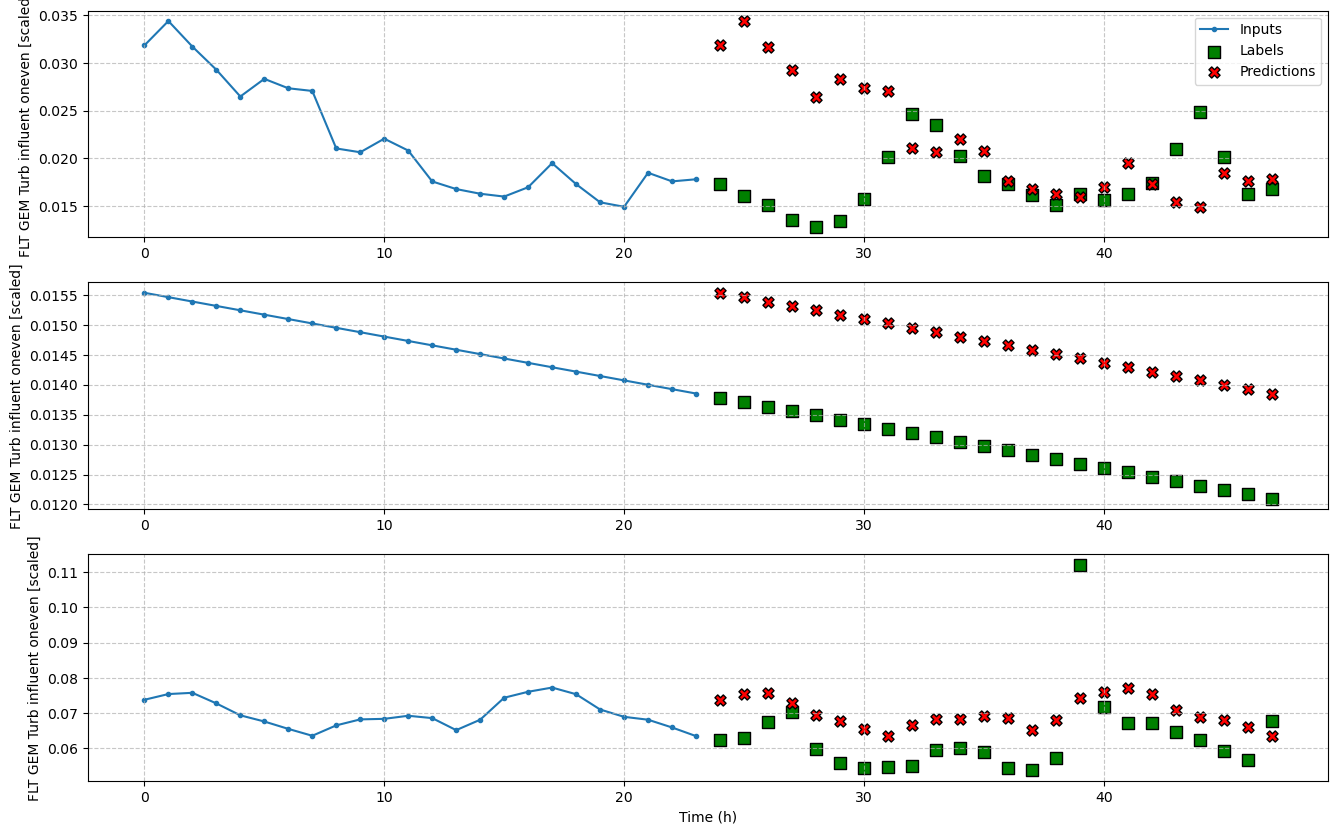

In [193]:
multi_window.plot(ms_baseline_repeat)

plt.savefig('figures/CH13_F11_peixeiro.png', dpi=300)

In [194]:
print(ms_performance['Baseline - Repeat'][1])

0.6637364029884338


## Implementing a linear model
### Building a single-step linear model

In [195]:
# Function to configure a deep learning model and fit it on data
def compile_and_fit(model, window, patience=3, max_epochs=50):
    early_stopping = EarlyStopping(monitor='val_loss',
                                   patience=patience,
                                   mode='min')
    
    model.compile(loss=MeanSquaredError(),
                  optimizer=Adam(),
                  metrics=[MeanAbsoluteError()])
    
    history = model.fit(window.train,
                       epochs=max_epochs,
                       validation_data=window.val,
                       callbacks=[early_stopping])
    
    return history

In [196]:
linear = Sequential([
    Dense(units=1)
])

history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)



Epoch 1/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2129 - mean_absolute_error: 0.3265 - val_loss: 0.0417 - val_mean_absolute_error: 0.1700
Epoch 2/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0164 - mean_absolute_error: 0.1015 - val_loss: 0.0255 - val_mean_absolute_error: 0.1333
Epoch 3/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0086 - mean_absolute_error: 0.0725 - val_loss: 0.0172 - val_mean_absolute_error: 0.1097
Epoch 4/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0047 - mean_absolute_error: 0.0532 - val_loss: 0.0111 - val_mean_absolute_error: 0.0880
Epoch 5/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0027 - mean_absolute_error: 0.0397 - val_loss: 0.0065 - val_mean_absolute_error: 0.0663
Epoch 6/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0016 - mean_absolute_error: 0.0297 - val_loss: 0.0035 - val_mean_absolute_error: 0.0466
Epoch 7/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0010 - mean_absolute_error: 0.0224 - v

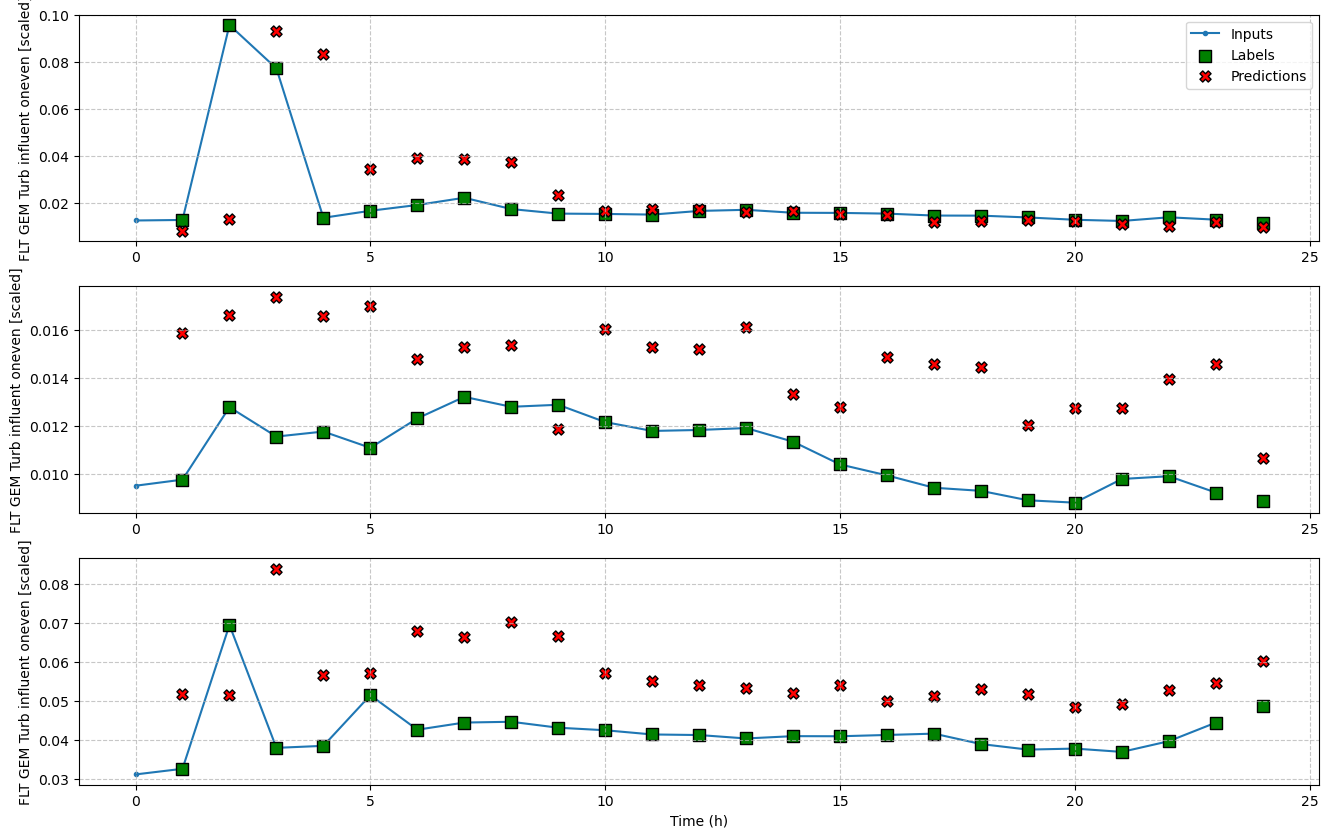

In [197]:
wide_window.plot(linear)

plt.savefig('figures/CH14_F02_peixeiro.png', dpi=300)

### Building a mutli-step linear model 

In [198]:
ms_linear = Sequential([
    Dense(1, kernel_initializer=tf.initializers.zeros)
])

history = compile_and_fit(ms_linear, multi_window)

ms_val_performance['Linear'] = ms_linear.evaluate(multi_window.val)
ms_performance['Linear'] = ms_linear.evaluate(multi_window.test, verbose=0)


Epoch 1/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0021 - mean_absolute_error: 0.0302 - val_loss: 0.0019 - val_mean_absolute_error: 0.0258
Epoch 2/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0011 - mean_absolute_error: 0.0194 - val_loss: 0.0017 - val_mean_absolute_error: 0.0212
Epoch 3/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9.1455e-04 - mean_absolute_error: 0.0160 - val_loss: 0.0016 - val_mean_absolute_error: 0.0185
Epoch 4/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.8540e-04 - mean_absolute_error: 0.0147 - val_loss: 0.0016 - val_mean_absolute_error: 0.0202
Epoch 5/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.8715e-04 - mean_absolute_error: 0.0144 - val_loss: 0.0016 - val_mean_absolute_error: 0.0183
Epoch 6/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.0229e-04 - mean_absolute_error: 0.0145 - val_loss: 0.0016 - val_mean_absolute_error: 0.0190
Epoch 7/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.8835e-04 - mean_absolu

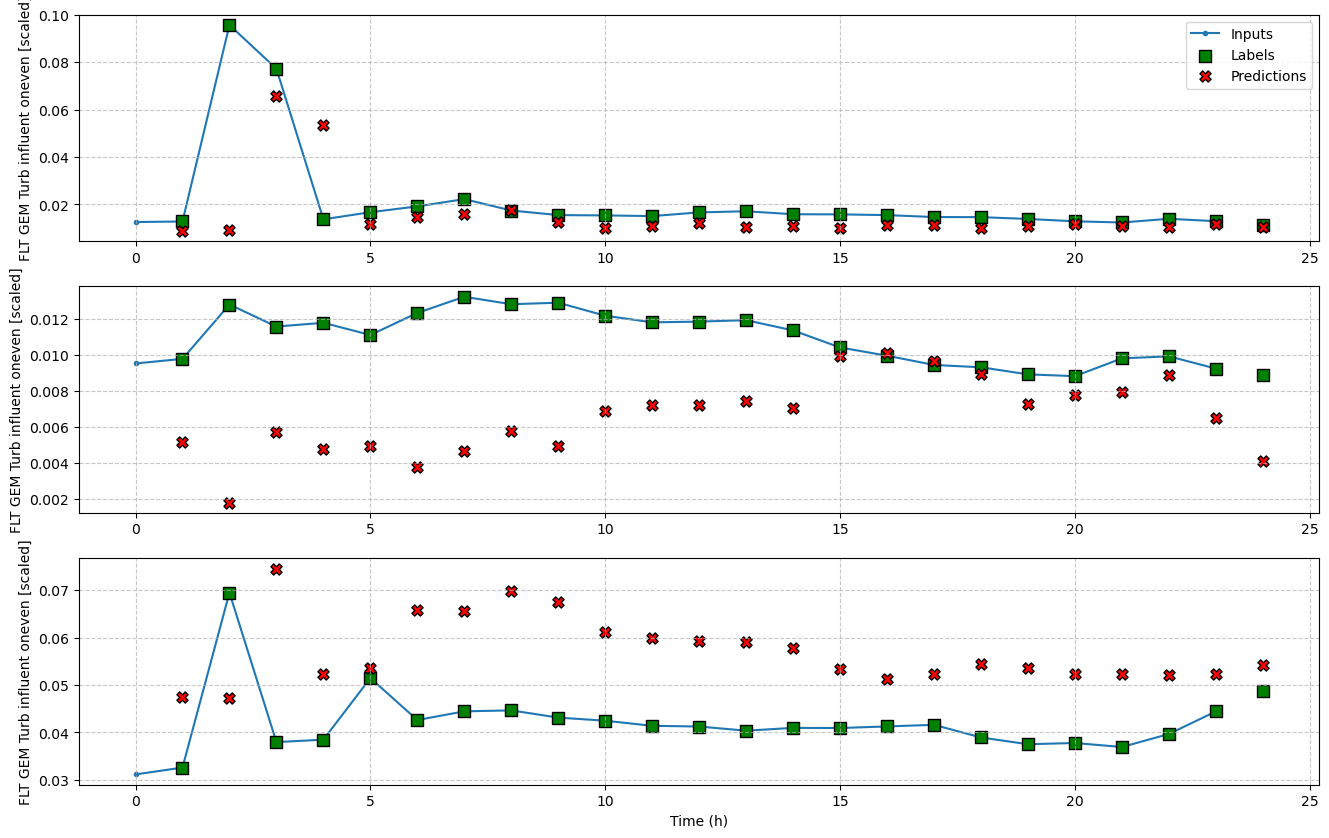

In [199]:
wide_window.plot(ms_linear)

## Implementing a deep neural network
### Implementing a deep neural network as a single-step model

In [200]:
dense = Sequential([
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0046 - mean_absolute_error: 0.0438 - val_loss: 0.0025 - val_mean_absolute_error: 0.0334
Epoch 2/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.5983e-04 - mean_absolute_error: 0.0167 - val_loss: 0.0021 - val_mean_absolute_error: 0.0295
Epoch 3/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.4776e-04 - mean_absolute_error: 0.0144 - val_loss: 0.0020 - val_mean_absolute_error: 0.0275
Epoch 4/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.8144e-04 - mean_absolute_error: 0.0126 - val_loss: 0.0019 - val_mean_absolute_error: 0.0272
Epoch 5/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4583e-04 - mean_absolute_error: 0.0118 - val_loss: 0.0017 - val_mean_absolute_error: 0.0258
Epoch 6/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4228e-04 - mean_absolute_error: 0.0120 - val_loss: 0.0016 - val_mean_absolute_error: 0.0270
Epoch 7/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0838e-04 - mean_ab

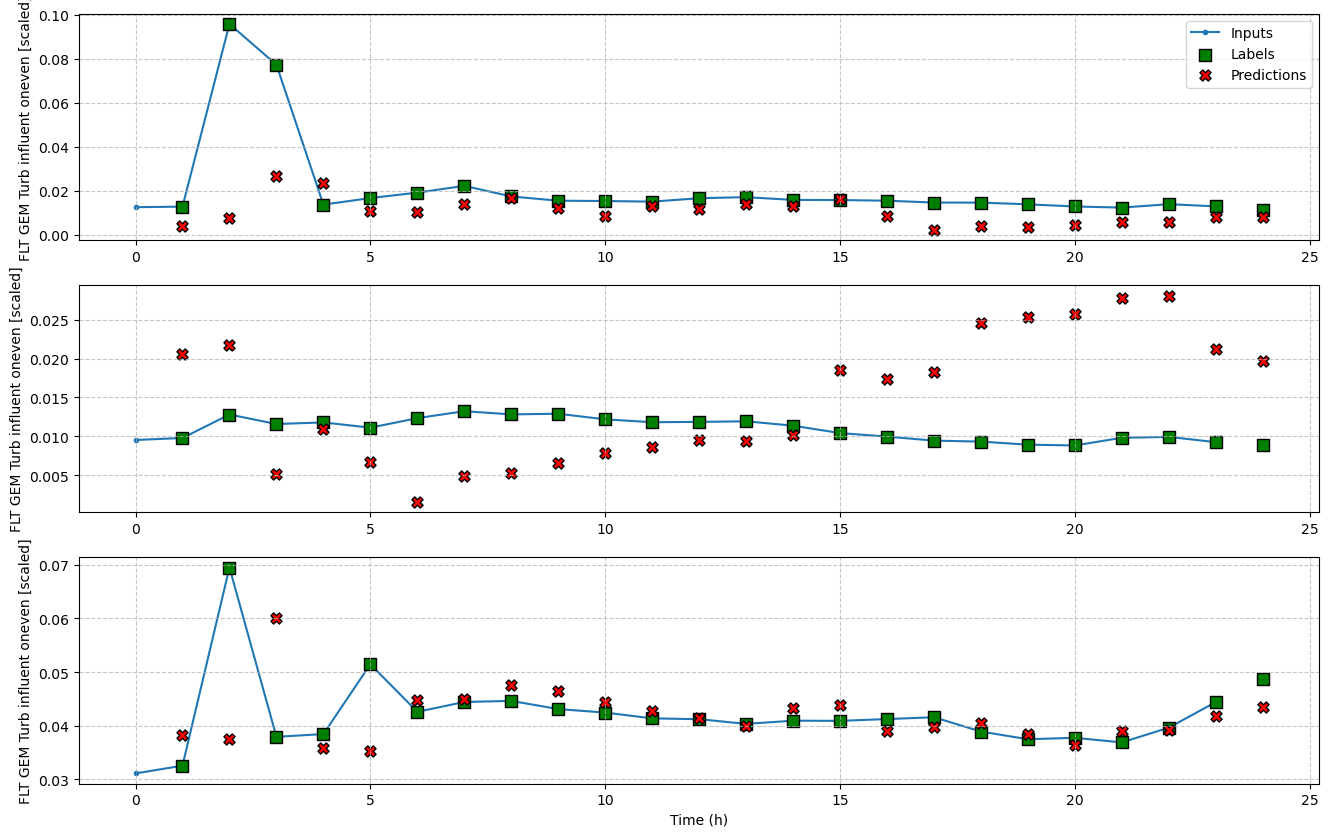

In [201]:
wide_window.plot(dense)

plt.savefig('figures/CH14_F06_peixeiro.png', dpi=300)

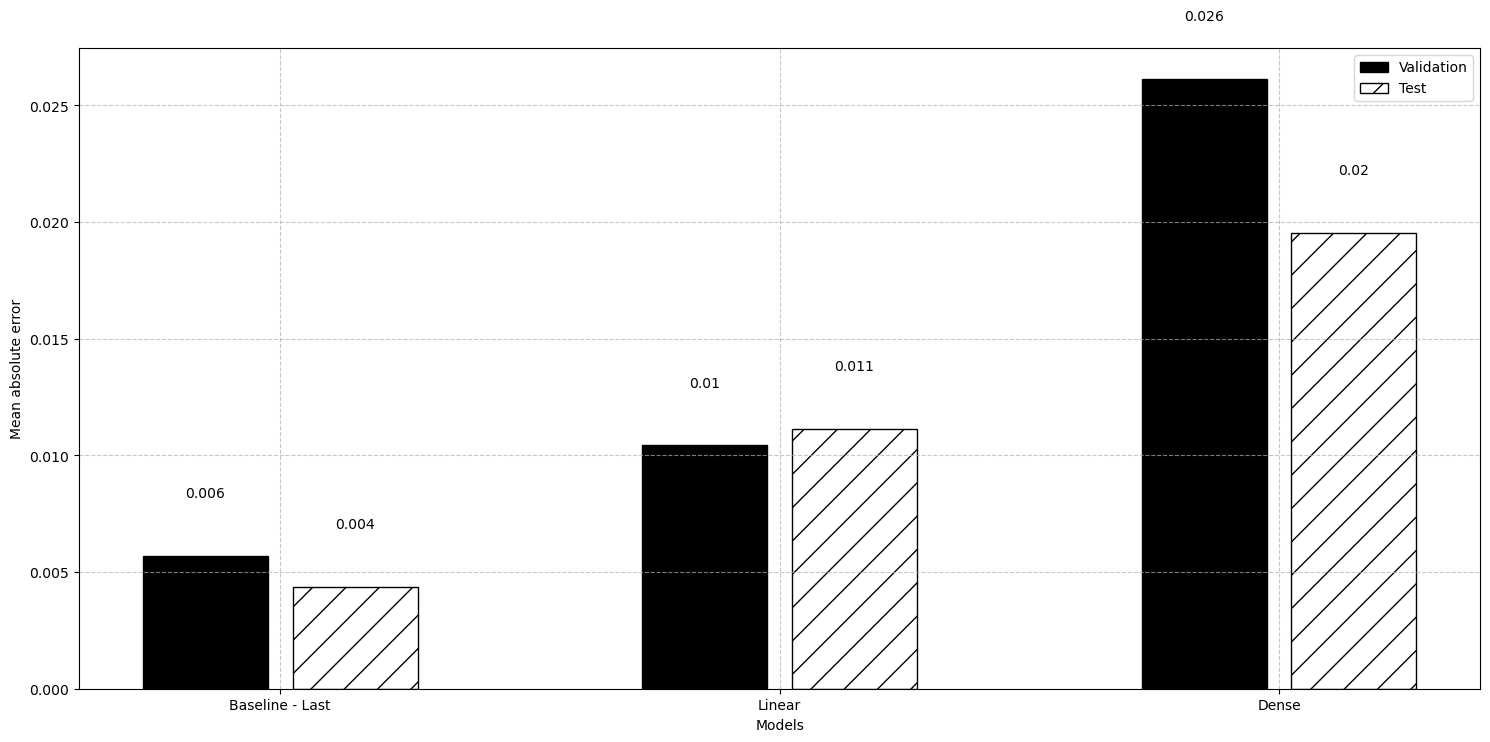

In [202]:
mae_val = [v[1] for v in val_performance.values()]
mae_test = [v[1] for v in performance.values()]

x = np.arange(len(performance))

fig, ax = plt.subplots()
ax.bar(x - 0.15, mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')

for index, value in enumerate(mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')
    
for index, value in enumerate(mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')

plt.xticks(ticks=x, labels=performance.keys())
plt.legend(loc='best')
plt.tight_layout()

plt.savefig('figures/CH14_F07_peixeiro.png', dpi=300)

### Implementing a deep neural network as a multi-step model 

In [203]:
ms_dense = Sequential([
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, kernel_initializer=tf.initializers.zeros),
])

history = compile_and_fit(ms_dense, multi_window)

ms_val_performance['Dense'] = ms_dense.evaluate(multi_window.val)
ms_performance['Dense'] = ms_dense.evaluate(multi_window.test, verbose=0)

Epoch 1/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0014 - mean_absolute_error: 0.0220 - val_loss: 0.0050 - val_mean_absolute_error: 0.0458
Epoch 2/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.5212e-04 - mean_absolute_error: 0.0129 - val_loss: 0.0052 - val_mean_absolute_error: 0.0457
Epoch 3/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.0760e-04 - mean_absolute_error: 0.0122 - val_loss: 0.0053 - val_mean_absolute_error: 0.0460
Epoch 4/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.6194e-04 - mean_absolute_error: 0.0116 - val_loss: 0.0051 - val_mean_absolute_error: 0.0452
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0051 - mean_absolute_error: 0.0452


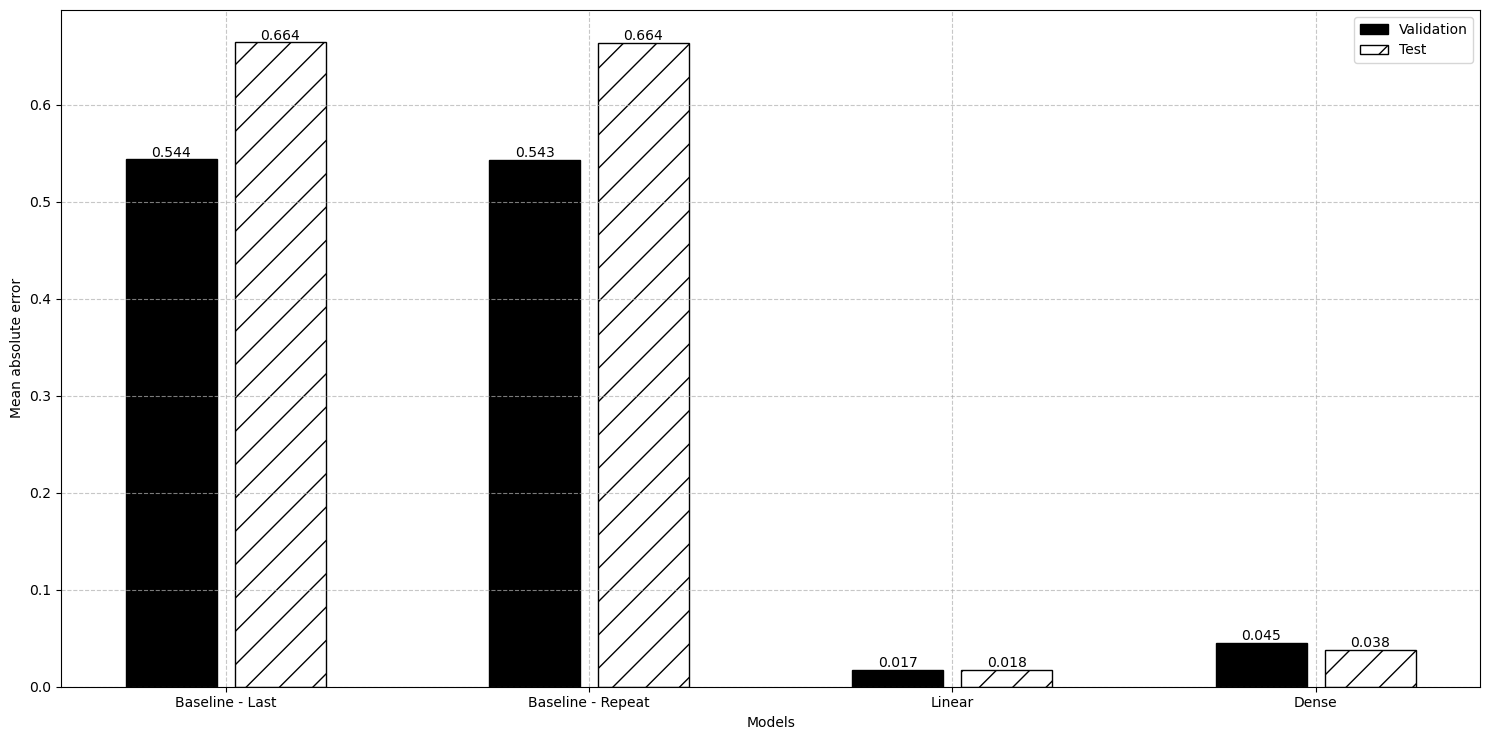

In [204]:
ms_mae_val = [v[1] for v in ms_val_performance.values()]
ms_mae_test = [v[1] for v in ms_performance.values()]

x = np.arange(len(ms_performance))

fig, ax = plt.subplots()
ax.bar(x - 0.15, ms_mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, ms_mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')

for index, value in enumerate(ms_mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')
    
for index, value in enumerate(ms_mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')

plt.xticks(ticks=x, labels=ms_performance.keys())
plt.legend(loc='best')
plt.tight_layout()

plt.savefig('figures/CH14_F08_peixeiro.png', dpi=300)

# LSTM

## Single-step model

In [205]:
single_step_window = DataWindow(input_width=1, label_width=1, shift=1, label_columns=['FLT GEM Turb influent oneven']) 
wide_window = DataWindow(input_width=24, label_width=24, shift=1, label_columns=['FLT GEM Turb influent oneven'])

In [206]:
mae_val = [0.006, 0.012, 0.027]
mae_test = [0.004, 0.004, 0.024]

In [207]:
lstm_model = Sequential([
    LSTM(32, return_sequences=True),
    Dense(units=1)
])

history = compile_and_fit(lstm_model, wide_window)

val_performance = {}
performance = {}

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0037 - mean_absolute_error: 0.0374 - val_loss: 0.0010 - val_mean_absolute_error: 0.0160
Epoch 2/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4.4964e-04 - mean_absolute_error: 0.0111 - val_loss: 0.0010 - val_mean_absolute_error: 0.0150
Epoch 3/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3.7347e-04 - mean_absolute_error: 0.0085 - val_loss: 8.8410e-04 - val_mean_absolute_error: 0.0117
Epoch 4/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3.5365e-04 - mean_absolute_error: 0.0078 - val_loss: 8.8799e-04 - val_mean_absolute_error: 0.0118
Epoch 5/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3.3807e-04 - mean_absolute_error: 0.0072 - val_loss: 8.9027e-04 - val_mean_absolute_error: 0.0118
Epoch 6/50
574/574 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 3.3813e-04 - mean_absolute_error: 0.0073 - val_loss: 0.0010 - val_mean_absolute_error: 0.0150
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010 - mean_absol

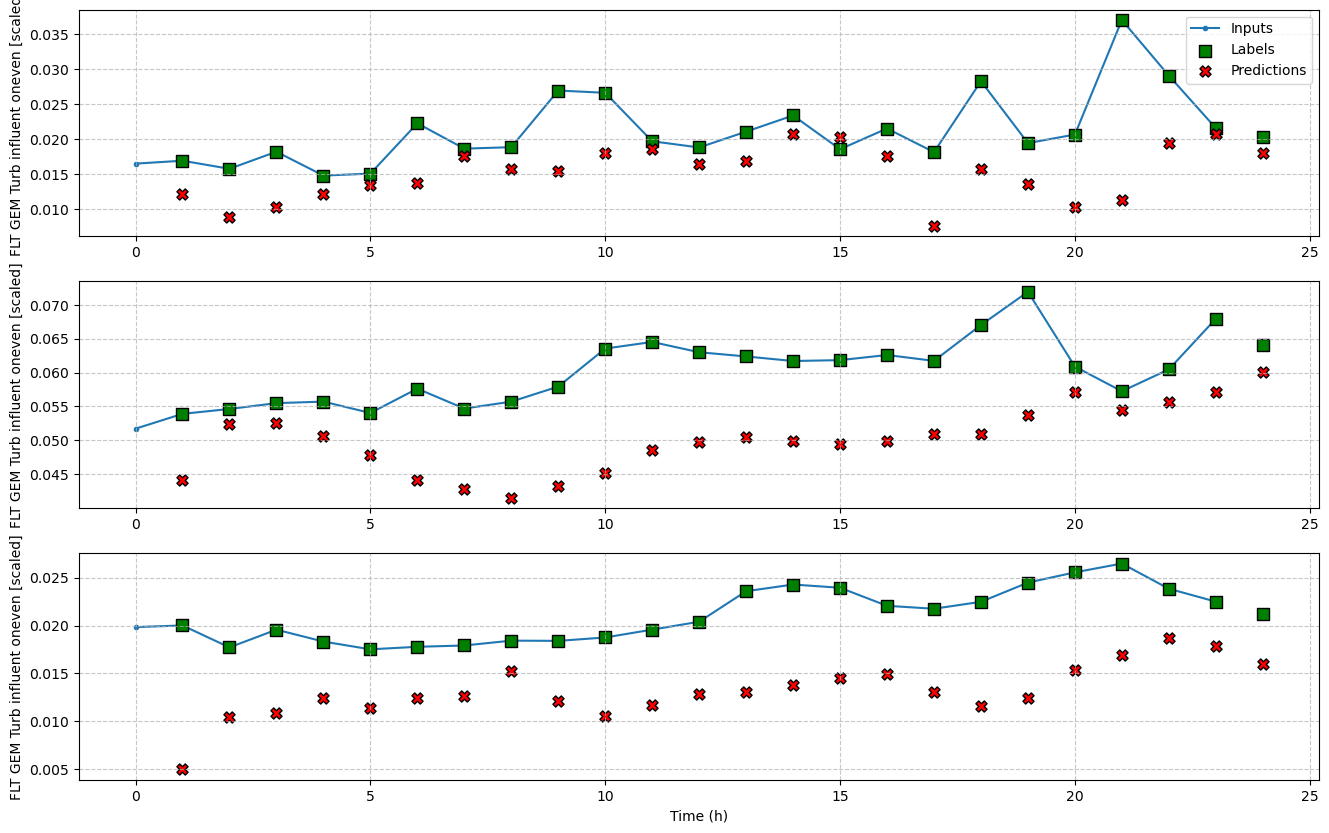

In [208]:
wide_window.plot(lstm_model)

plt.savefig('figures/CH15_F09_peixeiro.png', dpi=300)

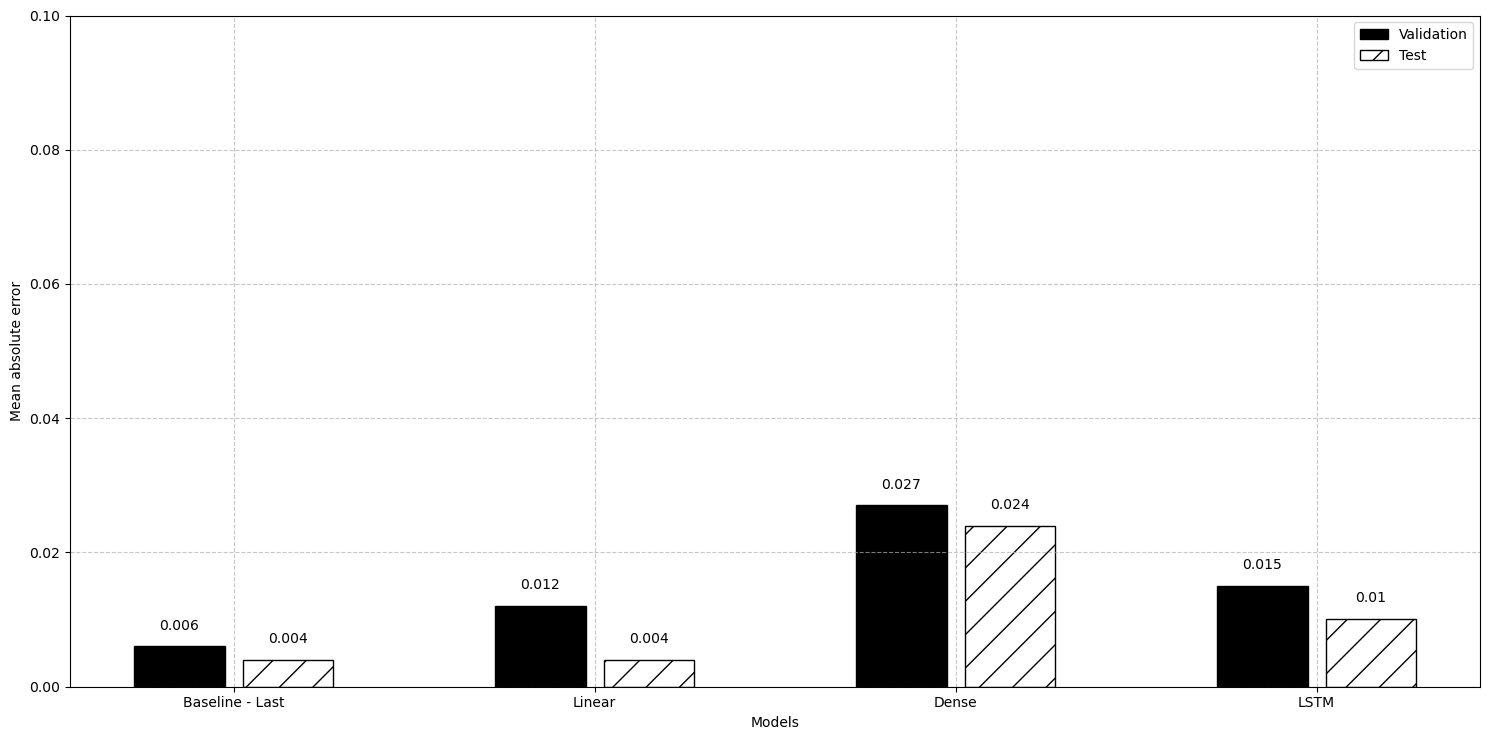

In [209]:
mae_val.append(val_performance['LSTM'][1])
mae_test.append(performance['LSTM'][1])

x = np.arange(4)

labels = ['Baseline - Last', 'Linear', 'Dense', 'LSTM']

fig, ax = plt.subplots()
ax.bar(x - 0.15, mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')

for index, value in enumerate(mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')
    
for index, value in enumerate(mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')
    
plt.ylim(0, 0.1)
plt.xticks(ticks=x, labels=labels)
plt.legend(loc='best')
plt.tight_layout()

plt.savefig('figures/CH15_F10_peixeiro.png', dpi=300)

## Multi-step model

In [210]:
multi_window = DataWindow(input_width=24, label_width=24, shift=24, label_columns=['FLT GEM Turb influent oneven'])

In [211]:
# Values obtained from chapter 14

ms_mae_val = [0.544, 0.543, 0.017, 0.044]
ms_mae_test = [0.664, 0.664, 0.018, 0.04]

In [212]:
ms_lstm_model = Sequential([
    LSTM(32, return_sequences=True),
    Dense(1, kernel_initializer=tf.initializers.zeros),
])

history = compile_and_fit(ms_lstm_model, multi_window)

ms_val_performance = {}
ms_performance = {}

ms_val_performance['LSTM'] = ms_lstm_model.evaluate(multi_window.val)
ms_performance['LSTM'] = ms_lstm_model.evaluate(multi_window.test, verbose=0)

Epoch 1/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0018 - mean_absolute_error: 0.0248 - val_loss: 0.0031 - val_mean_absolute_error: 0.0348
Epoch 2/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 7.6183e-04 - mean_absolute_error: 0.0144 - val_loss: 0.0027 - val_mean_absolute_error: 0.0325
Epoch 3/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 6.9235e-04 - mean_absolute_error: 0.0131 - val_loss: 0.0024 - val_mean_absolute_error: 0.0311
Epoch 4/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 6.2923e-04 - mean_absolute_error: 0.0120 - val_loss: 0.0024 - val_mean_absolute_error: 0.0295
Epoch 5/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 6.1562e-04 - mean_absolute_error: 0.0115 - val_loss: 0.0024 - val_mean_absolute_error: 0.0306
Epoch 6/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 5.9405e-04 - mean_absolute_error: 0.0114 - val_loss: 0.0024 - val_mean_absolute_error: 0.0305
Epoch 7/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 5.7793e-04 - mean_ab

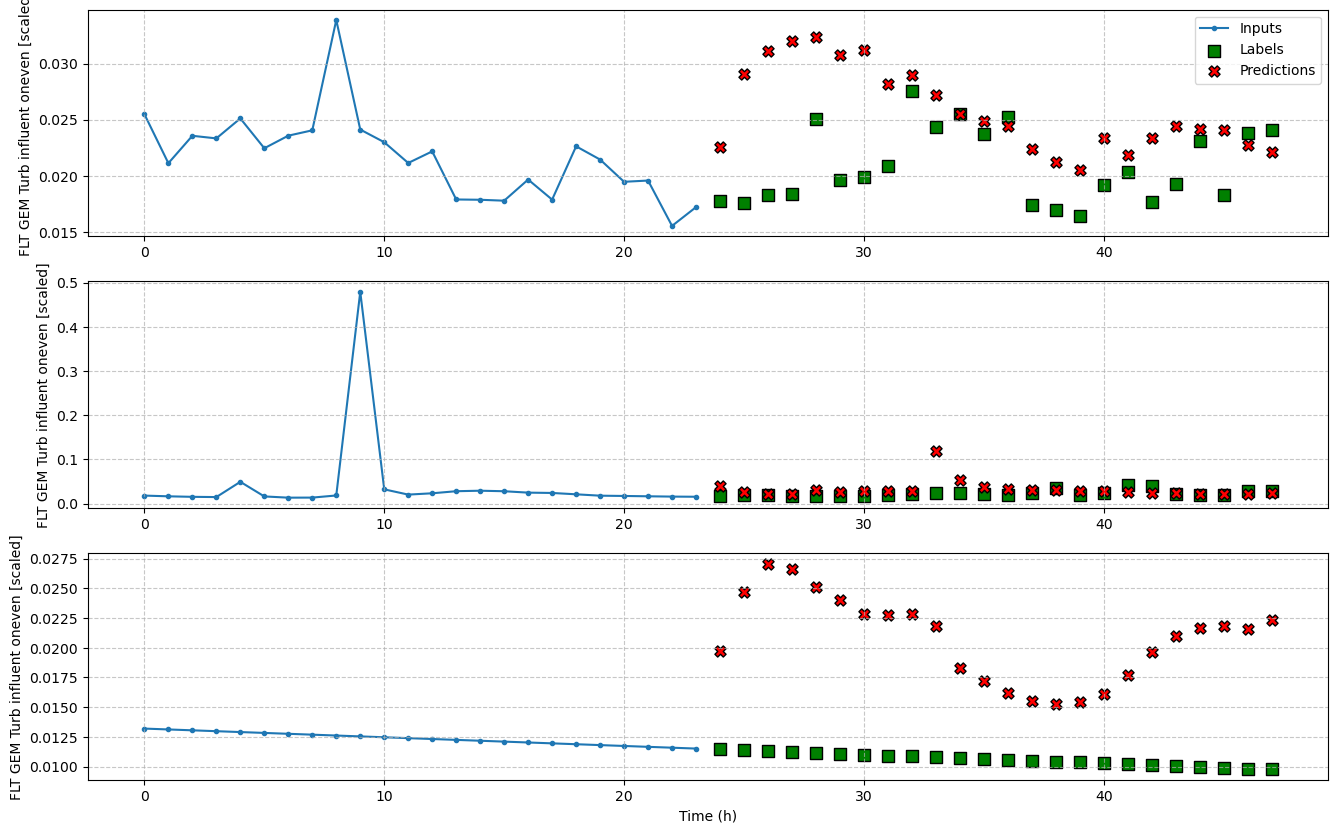

In [213]:
multi_window.plot(ms_lstm_model)

plt.savefig('figures/CH15_F11_peixeiro.png', dpi=300)

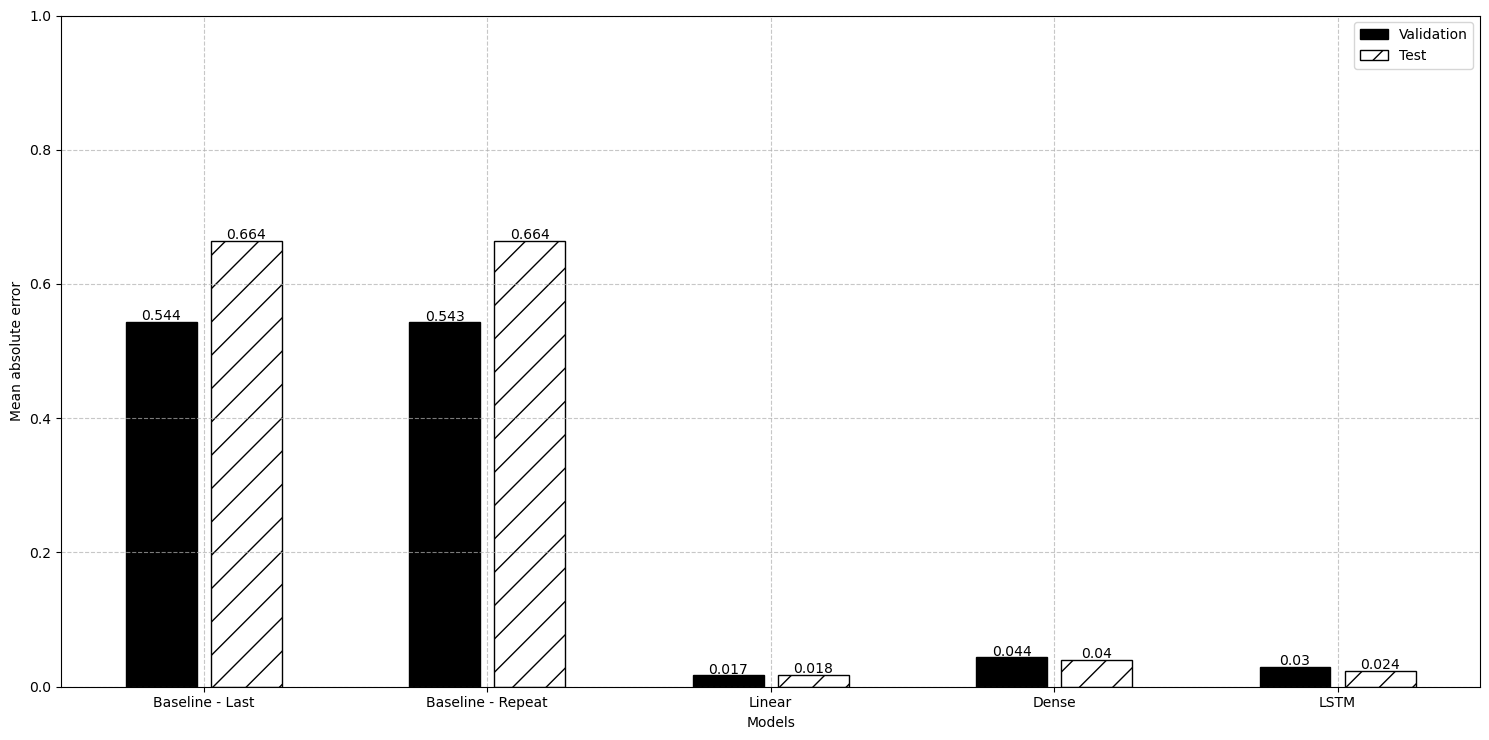

In [214]:
ms_mae_val.append(ms_val_performance['LSTM'][1])
ms_mae_test.append(ms_performance['LSTM'][1])

x = np.arange(5)

labels = ['Baseline - Last', 'Baseline - Repeat', 'Linear', 'Dense', 'LSTM']

fig, ax = plt.subplots()
ax.bar(x - 0.15, ms_mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, ms_mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')

for index, value in enumerate(ms_mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')
    
for index, value in enumerate(ms_mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')

plt.ylim(0, 1)
plt.xticks(ticks=x, labels=labels)
plt.legend(loc='best')
plt.tight_layout()

plt.savefig('figures/CH15_F12_peixeiro.png', dpi=300)

## CNN

### Single-step model

In [215]:
KERNEL_WIDTH = 3
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + KERNEL_WIDTH - 1

conv_window = DataWindow(input_width=KERNEL_WIDTH, label_width=1, shift=1, label_columns=['FLT GEM Turb influent oneven'])
wide_conv_window = DataWindow(input_width=INPUT_WIDTH, label_width=LABEL_WIDTH, shift=1, label_columns=['FLT GEM Turb influent oneven'])

In [216]:


mae_val = [0.006, 0.012, 0.027, 0.015]
mae_test = [0.004, 0.004, 0.024, 0.014]

In [217]:
cnn_model = Sequential([
    Conv1D(filters=32,
          kernel_size=(KERNEL_WIDTH,),
          activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

history = compile_and_fit(cnn_model, conv_window)

val_performance = {}
performance = {}

val_performance['CNN'] = cnn_model.evaluate(conv_window.val)
performance['CNN'] = cnn_model.evaluate(conv_window.test, verbose=0)

Epoch 1/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0135 - mean_absolute_error: 0.0578 - val_loss: 0.0035 - val_mean_absolute_error: 0.0370
Epoch 2/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.9849e-04 - mean_absolute_error: 0.0167 - val_loss: 0.0039 - val_mean_absolute_error: 0.0389
Epoch 3/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.9977e-04 - mean_absolute_error: 0.0135 - val_loss: 0.0035 - val_mean_absolute_error: 0.0366
Epoch 4/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.5871e-04 - mean_absolute_error: 0.0129 - val_loss: 0.0026 - val_mean_absolute_error: 0.0323
Epoch 5/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.6042e-04 - mean_absolute_error: 0.0127 - val_loss: 0.0020 - val_mean_absolute_error: 0.0286
Epoch 6/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.3831e-04 - mean_absolute_error: 0.0119 - val_loss: 0.0019 - val_mean_absolute_error: 0.0274
Epoch 7/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.2928e-04 - mean_ab

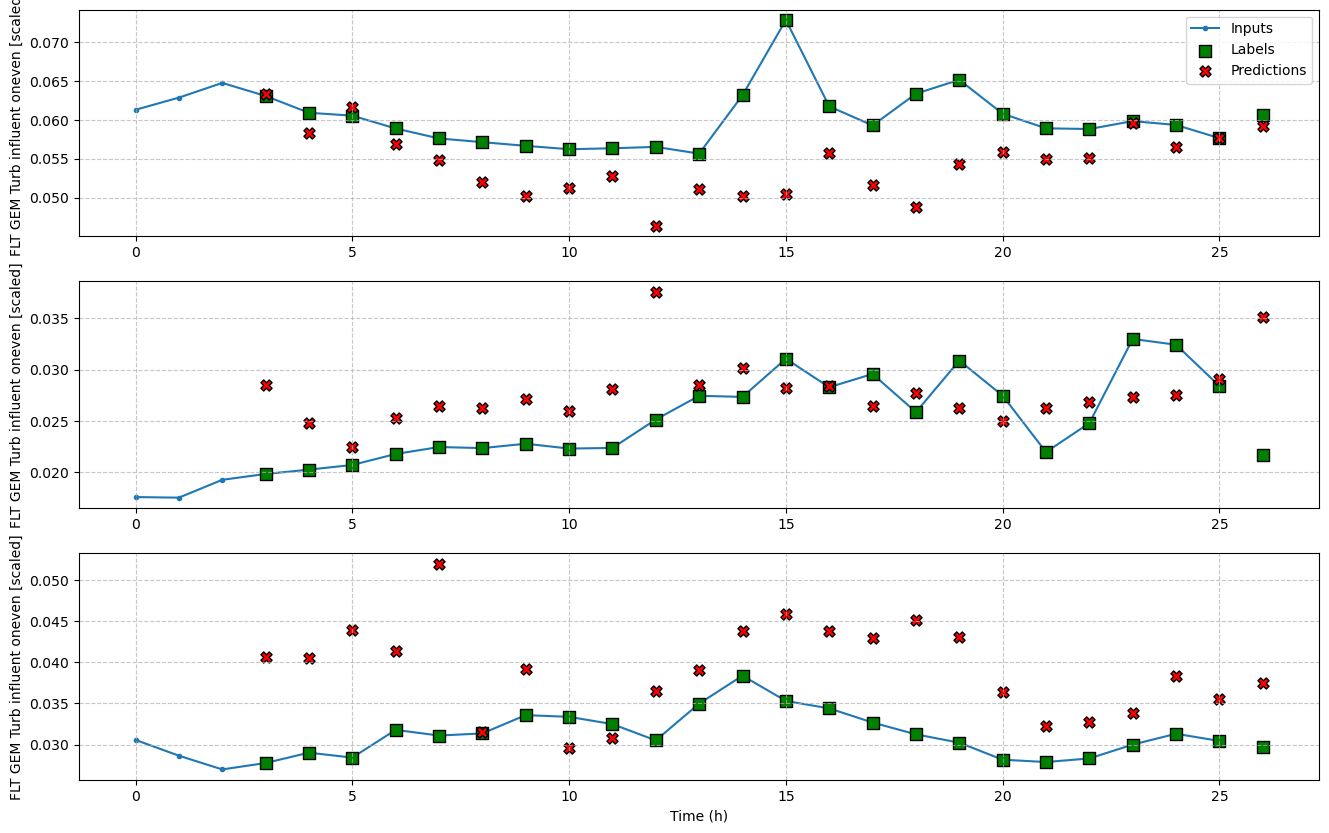

In [218]:
wide_conv_window.plot(cnn_model)

plt.savefig('figures/CH16_F05_peixeiro.png', dpi=300)

#### CNN + LSTM 

In [219]:
cnn_lstm_model = Sequential([
    Conv1D(filters=32,
          kernel_size=(KERNEL_WIDTH,),
          activation='relu'),
    LSTM(32, return_sequences=True),
    LSTM(32, return_sequences=True),
    Dense(1)
])

history = compile_and_fit(cnn_lstm_model, conv_window)

val_performance['CNN + LSTM'] = cnn_lstm_model.evaluate(conv_window.val)
performance['CNN + LSTM'] = cnn_lstm_model.evaluate(conv_window.test, verbose=0)

Epoch 1/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0020 - mean_absolute_error: 0.0277 - val_loss: 0.0039 - val_mean_absolute_error: 0.0426
Epoch 2/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6.3685e-04 - mean_absolute_error: 0.0140 - val_loss: 0.0029 - val_mean_absolute_error: 0.0348
Epoch 3/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 5.4812e-04 - mean_absolute_error: 0.0122 - val_loss: 0.0019 - val_mean_absolute_error: 0.0268
Epoch 4/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4.7564e-04 - mean_absolute_error: 0.0113 - val_loss: 0.0015 - val_mean_absolute_error: 0.0248
Epoch 5/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.8602e-04 - mean_absolute_error: 0.0109 - val_loss: 0.0019 - val_mean_absolute_error: 0.0257
Epoch 6/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.4251e-04 - mean_absolute_error: 0.0097 - val_loss: 0.0015 - val_mean_absolute_error: 0.0231
Epoch 7/50
575/575 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4.3588e-04 - mean_ab

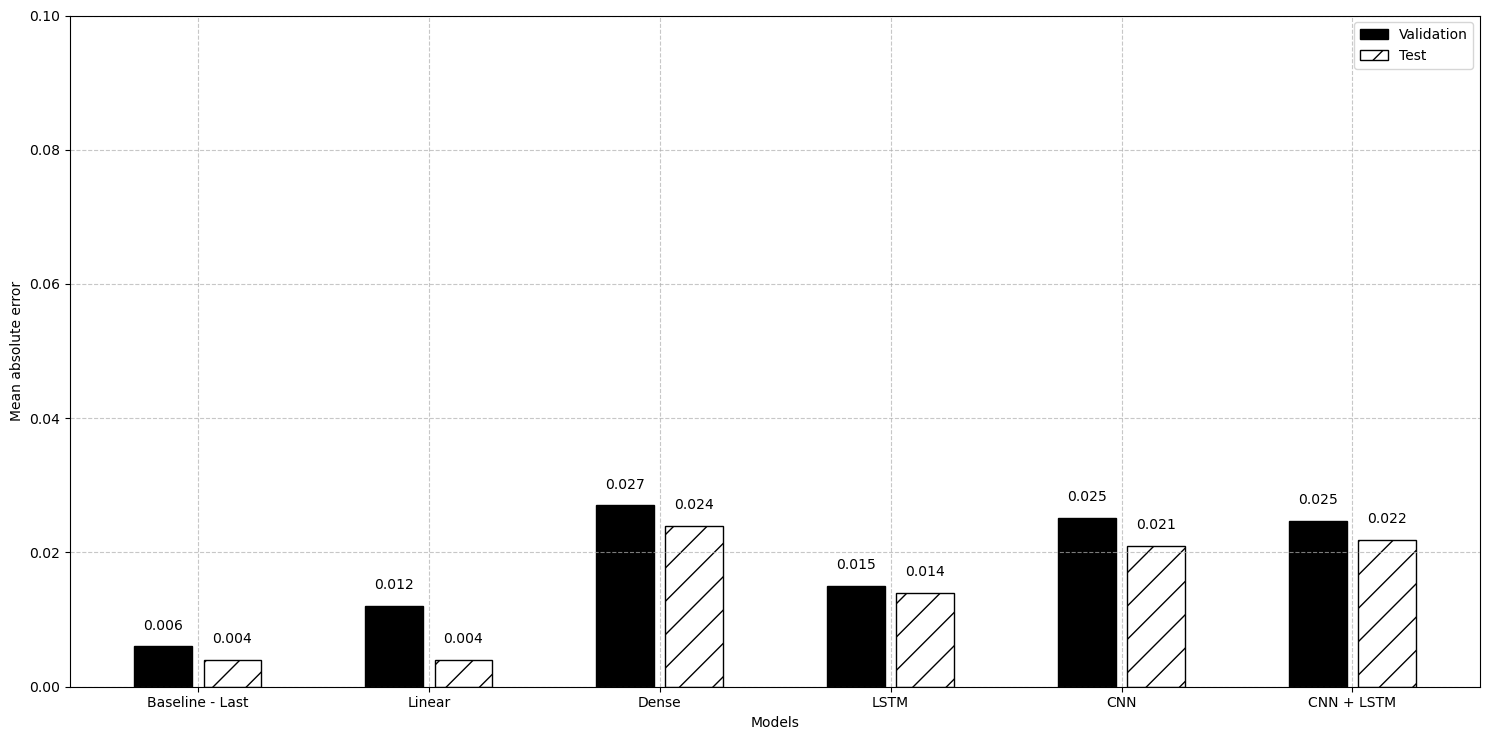

In [220]:
mae_val.extend([v[1] for v in val_performance.values()])
mae_test.extend([v[1] for v in performance.values()])

x = np.arange(6)

labels = ['Baseline - Last', 'Linear', 'Dense', 'LSTM', 'CNN', 'CNN + LSTM']

fig, ax = plt.subplots()
ax.bar(x - 0.15, mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')

for index, value in enumerate(mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')
    
for index, value in enumerate(mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')
    
plt.ylim(0, 0.1)
plt.xticks(ticks=x, labels=labels)
plt.legend(loc='best')
plt.tight_layout()

plt.savefig('figures/CH16_F06_peixeiro.png', dpi=300)

### Multi-step model 

In [221]:
KERNEL_WIDTH = 3
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + KERNEL_WIDTH - 1

multi_window = DataWindow(input_width=INPUT_WIDTH, label_width=LABEL_WIDTH, shift=24, label_columns=['FLT GEM Turb influent oneven'])

In [222]:

ms_mae_val = [0.544, 0.543, 0.017, 0.044, 0.036]
ms_mae_test = [0.664, 0.664, 0.018, 0.04, 0.026]

In [223]:
ms_cnn_model = Sequential([
    Conv1D(32, activation='relu', kernel_size=(KERNEL_WIDTH)),
    Dense(units=32, activation='relu'),
    Dense(1, kernel_initializer=tf.initializers.zeros),
])

history = compile_and_fit(ms_cnn_model, multi_window)

ms_val_performance = {}
ms_performance = {}

ms_val_performance['CNN'] = ms_cnn_model.evaluate(multi_window.val)
ms_performance['CNN'] = ms_cnn_model.evaluate(multi_window.test, verbose=0)

Epoch 1/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0016 - mean_absolute_error: 0.0233 - val_loss: 0.0047 - val_mean_absolute_error: 0.0437
Epoch 2/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.0250e-04 - mean_absolute_error: 0.0136 - val_loss: 0.0048 - val_mean_absolute_error: 0.0450
Epoch 3/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.3432e-04 - mean_absolute_error: 0.0124 - val_loss: 0.0051 - val_mean_absolute_error: 0.0464
Epoch 4/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.0850e-04 - mean_absolute_error: 0.0120 - val_loss: 0.0054 - val_mean_absolute_error: 0.0466
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0056 - mean_absolute_error: 0.0471


#### CNN + LSTM 

In [224]:
ms_cnn_lstm_model = Sequential([
    Conv1D(32, activation='relu', kernel_size=(KERNEL_WIDTH)),
    LSTM(32, return_sequences=True),
    Dense(1, kernel_initializer=tf.initializers.zeros),
])

history = compile_and_fit(ms_cnn_lstm_model, multi_window)

ms_val_performance['CNN + LSTM'] = ms_cnn_lstm_model.evaluate(multi_window.val)
ms_performance['CNN + LSTM'] = ms_cnn_lstm_model.evaluate(multi_window.test, verbose=0)

Epoch 1/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0016 - mean_absolute_error: 0.0232 - val_loss: 0.0041 - val_mean_absolute_error: 0.0423
Epoch 2/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 7.0611e-04 - mean_absolute_error: 0.0140 - val_loss: 0.0045 - val_mean_absolute_error: 0.0402
Epoch 3/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 6.3411e-04 - mean_absolute_error: 0.0125 - val_loss: 0.0036 - val_mean_absolute_error: 0.0389
Epoch 4/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 5.9372e-04 - mean_absolute_error: 0.0115 - val_loss: 0.0031 - val_mean_absolute_error: 0.0364
Epoch 5/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 5.6856e-04 - mean_absolute_error: 0.0109 - val_loss: 0.0032 - val_mean_absolute_error: 0.0344
Epoch 6/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 5.4784e-04 - mean_absolute_error: 0.0107 - val_loss: 0.0030 - val_mean_absolute_error: 0.0356
Epoch 7/50
573/573 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 5.2944e-04 - mean_ab

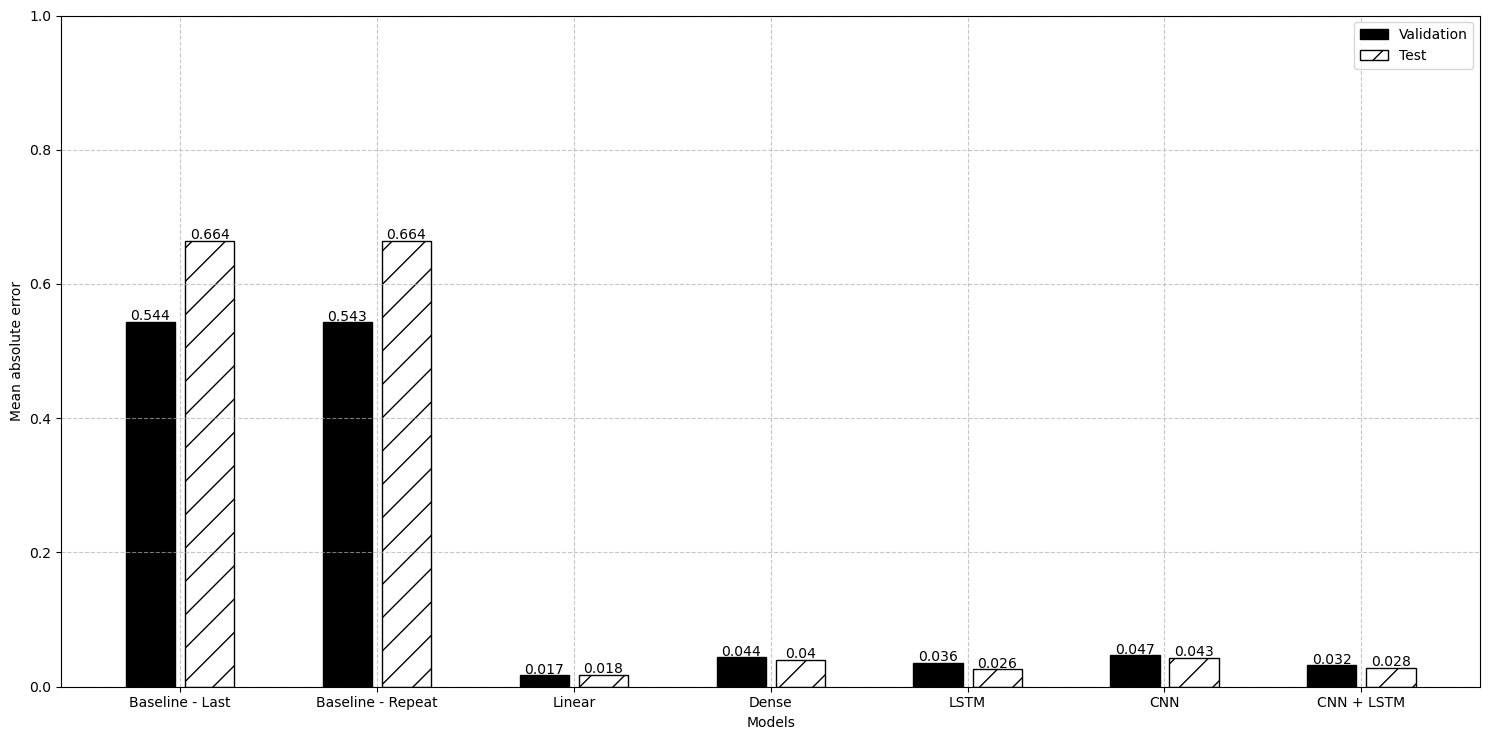

In [225]:
ms_mae_val.extend([v[1] for v in ms_val_performance.values()])
ms_mae_test.extend([v[1] for v in ms_performance.values()])

x = np.arange(7)

labels = ['Baseline - Last', 'Baseline - Repeat', 'Linear', 'Dense', 'LSTM', 'CNN', 'CNN + LSTM']

fig, ax = plt.subplots()
ax.bar(x - 0.15, ms_mae_val, width=0.25, color='black', edgecolor='black', label='Validation')
ax.bar(x + 0.15, ms_mae_test, width=0.25, color='white', edgecolor='black', hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')

for index, value in enumerate(ms_mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')
    
for index, value in enumerate(ms_mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)), ha='center')

plt.ylim(0, 1)
plt.xticks(ticks=x, labels=labels)
plt.legend(loc='best')
plt.tight_layout()

plt.savefig('figures/CH16_F07_peixeiro.png', dpi=300)

##